<a href="https://colab.research.google.com/github/mikeusru/neural-network-training/blob/main/1_neural_networks_with_keras_and_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks
In today's world, the meat of why people get into data science and machine learning is Neural Networks. Neural Networks were difficult to wield until recently due to the massive computational power they require, however, the advancement of hardware, especially gaming GPUs, has given breath to what mostly existed as a theoretical concept. Now, neural networks are as plentiful as they are variable, and are being used for everything under the sun.

We'll be using Tensorflow with a Keras backend for handling neural networks, and we'll try to do as much as we can in google colab, which offers you a free GPU/TPU to use. THANKS, GOOGLE.

The dataset we'll start with is called the fashin MNIST - similar to the MNIST dataset of labeled digits, but a more difficult challenge (it's harder to tell the difference between a coat/shirt/pullover/t-shirt than a 3 and a 7).

In [1]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.4.1'

In [2]:
keras.__version__

'2.4.0'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print(f"\nTraining Set Shape: {X_train_full.shape}")


Training Set Shape: (60000, 28, 28)


We loaded the data, and see that it's a long list of 28x28 images (unlike in scikit-learn, where images are represented by 1D arrays).

The data is already split into training and test sets for us, but there are no validation sets. Let's make those now, while also converting the images from uint8 (integers between 0 and 255) to floats between 0 and 1.

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

We need to keep track of class names, which we can look up online.

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Now let's take a look at some of the data.

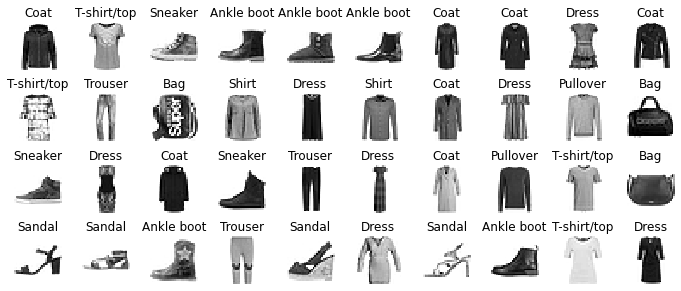

In [6]:
from matplotlib import pyplot as plt
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)


Truth be told, I didn't know what a pullover was before looking at this dataset, and am still curious if it's a british vs american thing.

## Building a sequential model
We don't need to do any preprocessing on this data, so we're going to get right to building our model. We'll build a sequential model, which is the easiest way to start and visualize what's happening.

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

We defined our model, added a layer to flatten our data from (28,28) to 784, and added three dense layers with 300, 100, and 10 neurons. The last dense layer is the output layer, containing 10 classes, and using a softmax function since the classes are mutually exclusive. *That's literally the whole thing*. This is like the microsoft excel of neural networks you guys - very high level and approachable.

## Visualization
Let's visualize the thing we just built.

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


266,610 total trainable parameters! I hope we don't overfit anything, because that's a lot more than what we saw in our previous scikit-learn exercises. Let's visualize the network as a flowchart as well. 

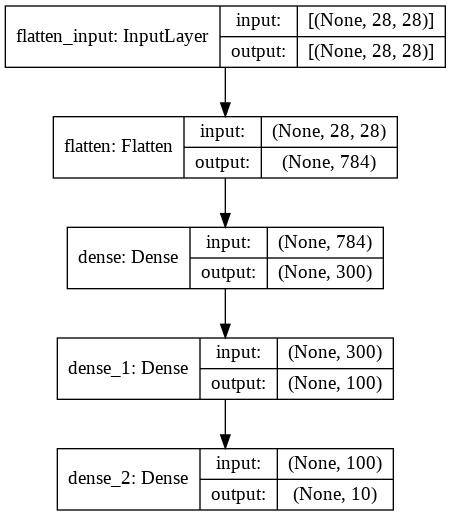

In [9]:
keras.utils.plot_model(model, show_shapes=True)

Beautiful! There are plenty of tools which can help us visualize our networks, but since we're still in the simple stages, this one works great. We can also inspect the weights and biases of each layer. Note what the weights are already initialized to random numbers, since training wouldn't work if the weights were all 0.

In [10]:
weights, biases = model.layers[1].get_weights()
weights

array([[-0.01402917,  0.034097  , -0.01354246, ..., -0.0562462 ,
         0.06414632, -0.0072024 ],
       [-0.01576182, -0.06202665,  0.02105144, ..., -0.01639875,
        -0.05632627,  0.00564876],
       [-0.04118737,  0.0482738 , -0.03652361, ..., -0.05202379,
         0.00177146, -0.0590772 ],
       ...,
       [ 0.02461005, -0.03393954, -0.03816525, ...,  0.0463922 ,
        -0.01021606,  0.05352996],
       [-0.07262366,  0.02355223,  0.02847734, ..., -0.03742551,
         0.00363456,  0.0005184 ],
       [ 0.06181386,  0.02406657,  0.03251253, ...,  0.05663282,
         0.06874937, -0.07273462]], dtype=float32)

In [11]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Notice that the network has defined shapes for the input, and defined amounts of weights and biases. This means that if it's trained on a 28x28 image and we try to predict an 8x8 image, it won't work. The input has to match the network architecture.

## Compiling and Training
We compile the model once it's built, adding a loss function, optimizer, and metrics. We have lots of options, but the loss and optimizer was chosen due to us having a list of mutually exclusive outputs.

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd",
                metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 1.0057 - accuracy: 0.6769 - val_loss: 0.5405 - val_accuracy: 0.8118
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5020 - accuracy: 0.8273 - val_loss: 0.4743 - val_accuracy: 0.8360
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4540 - accuracy: 0.8416 - val_loss: 0.4152 - val_accuracy: 0.8574
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4247 - accuracy: 0.8519 - val_loss: 0.4073 - val_accuracy: 0.8616
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4004 - accuracy: 0.8593 - val_loss: 0.4036 - val_accuracy: 0.8636
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3841 - accuracy: 0.8647 - val_loss: 0.3781 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3689 - accuracy: 0.8706 - val_loss: 0.3640 - val_accuracy:

There are plenty of tools to visualize our training session. Let's try pandas first.

(0.0, 1.0)

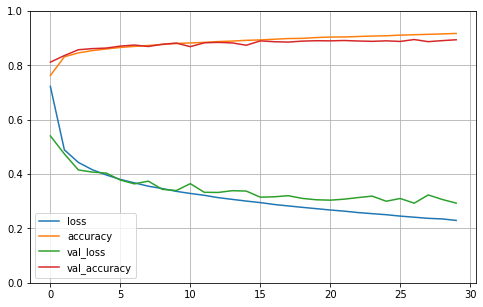

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)


The metric we really care about here is val_accuracy and val_loss... as long as val_loss hasn't plateaued, we can keep on training. Either way, let's check out accuracy at this point.

In [15]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3248 - accuracy: 0.8857


[0.3247720003128052, 0.885699987411499]

88.6% - Not bad! Let's use this trained model to make a prediction.

In [35]:
import numpy as np

X_new_cases = X_test[:3]
y_proba = model.predict(X_new_cases)
y_pred = np.argmax(y_proba, axis=-1)
y_pred

array([9, 2, 1])

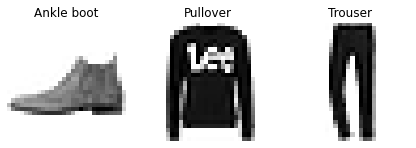

In [36]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new_cases):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)


## Non-sequential models

In the previous model we built, every output flowed into the next layer's input. Not all models work this way. As a matter of fact, virtually all of the newer networks have more complicated structures with non-seqential parts. We'll train what's called a *wide and deep* network, where the input layer will flow both into the first hidden layer, as wel as a concatenate layer.

In [69]:
input = keras.layers.Input(shape=X_train.shape[1:])
flatten = keras.layers.Flatten()(input)
hidden1 = keras.layers.Dense(300, activation="relu")(flatten)
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([flatten, hidden2])
output = keras.layers.Dense(10, activation='softmax')(concat)
model = keras.Model(inputs=[input], outputs=[output])

In [56]:
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd",
                metrics=["accuracy"])

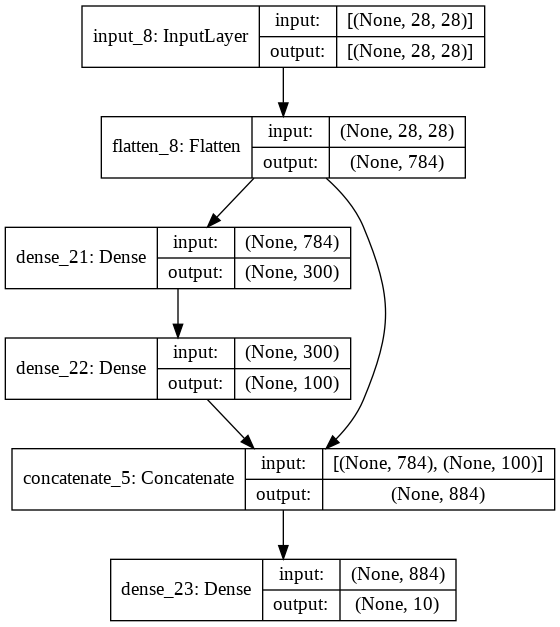

In [57]:
keras.utils.plot_model(model, show_shapes=True)

To direct inputs and outputs between layers, we gave each layer a name and added its input as a function call following its instantiation. What fun we're having! Now, what if i told you that a neural network can have multiple input layers, and even multiple output layers!? THAT WOULD BE A NEW THING I TOLD YOU! Let's see how we're gonna get it done. We're gonna load up the california housing dataset here, with a fun goal of predicting how much a house's price is going to be based on some features.

In [65]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

In [96]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [111]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd", metrics="accuracy")

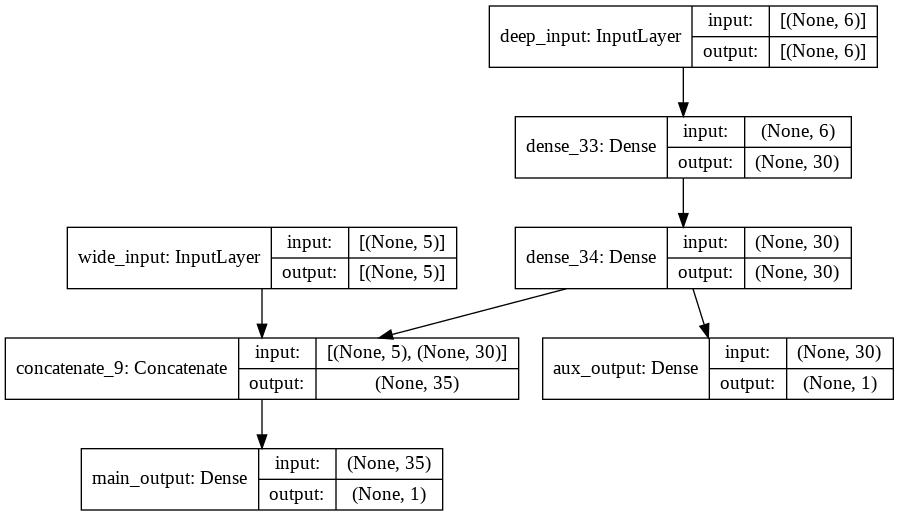

In [112]:
keras.utils.plot_model(model, show_shapes=True)

We could have trained two separate neural networks for this, but instead, we have two input layers and two output layers. You might also have noticed that information can flow from the deep_nput layer to both the main_ and aux_output layers, however, the wide_input layer does not affect the result in the aux_output layer. Thus, we can control the flow of information in our neural nets.

You may also have noticed that we have multiple values for loss and loss_weights. This indicates a loss for each output, and the loss_weights of `[0.9, 0.1]` mean that the network takes into account the first loss much more than the second one. So, during training, we're saying it's more important for the first output to be accurate than the second one.

When training a model like this, we also need to provide two separate X training and y label sets, one for each input and output. In this particular case, the labels are the same for both outputs (stupid).

In [113]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_val_A, X_val_B = X_val[:, :5], X_val[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]

X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_val_A, X_val_B], [y_val, y_val]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3557 - main_output_loss: 0.3429 - aux_output_loss: 0.4710 - main_output_accuracy: 0.0035 - aux_output_accuracy: 0.0035 - val_loss: 1.9372 - val_main_output_loss: 1.8798 - val_aux_output_loss: 2.4542 - val_main_output_accuracy: 0.0028 - val_aux_output_accuracy: 0.0026
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3700 - main_output_loss: 0.3580 - aux_output_loss: 0.4785 - main_output_accuracy: 0.0023 - aux_output_accuracy: 0.0023 - val_loss: 2.1890 - val_main_output_loss: 2.1368 - val_aux_output_loss: 2.6583 - val_main_output_accuracy: 0.0028 - val_aux_output_accuracy: 0.0026
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3481 - main_output_loss: 0.3357 - aux_output_loss: 0.4594 - main_output_accuracy: 0.0025 - aux_output_accuracy: 0.0025 - val_loss: 2.1937 - val_main_output_loss: 2.1368 - val_aux_output_loss: 2.7056 - val_main_output_accuracy: 0.0028 - 

In [114]:
model.evaluate([X_test_A, X_test_B],[y_test, y_test])

162/162 [==============================] - 0s 1ms/step - loss: 0.3979 - main_output_loss: 0.3878 - aux_output_loss: 0.4891 - main_output_accuracy: 0.0027 - aux_output_accuracy: 0.0025


[0.3978932499885559,
 0.3877545893192291,
 0.4891403913497925,
 0.0027131782844662666,
 0.002519379835575819]

this model, it is how you say, a-not-so-good. Don't use it. 

## Saving the model
But let's say it's not terrible and we actually understood what it's doing, so we'd want to save it to use later. Easy! the h5 file contains the architecture and weights of the model. Note that if you're using the subclass API to build the model, you'll need to rebuild it in code, and can't just load it up from the file like this. You can still save its weights though.

In [115]:
model.save('terrible_housing_model.h5')

In [117]:
model = keras.models.load_model('terrible_housing_model.h5')